<a href="https://colab.research.google.com/github/julioreis-dev/tutorial_pandas/blob/main/ipea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
df_admissao_url = '/content/drive/MyDrive/staging/ipeadata_admissao.csv'
df_demissao_url = '/content/drive/MyDrive/staging/ipeadata_demissao.csv'

In [4]:
df_admissao = pd.read_csv(df_admissao_url, sep=',')
df_demissao = pd.read_csv(df_demissao_url, sep=',')

In [5]:
df_admissao.head()

,Data,Empregados - admissões - Pessoa - Ministério do Trabalho e Emprego- Cadastro Geral de Empregados e Desempregados (MTE/CAGED) - CAGED12_ADMIS,Unnamed: 2
0,1999.05,732704,NaN
1,1999.06,731238,NaN
2,1999.07,685905,NaN
3,1999.08,690144,NaN
4,1999.09,698632,NaN


In [6]:
df_admissao.shape

(248, 3)

In [7]:
df_admissao.columns = ['data', 'admissao', 'descarte']

In [8]:
df_admissao.drop(columns=['descarte'], inplace=True)

In [9]:
df_admissao.head()

,data,admissao
0,1999.05,732704
1,1999.06,731238
2,1999.07,685905
3,1999.08,690144
4,1999.09,698632


In [10]:
df_admissao.isnull().sum()

data        0
admissao    0
dtype: int64

In [11]:
df_demissao.head()

,Data,Empregados - demissões - Pessoa - Ministério do Trabalho e Emprego- Cadastro Geral de Empregados e Desempregados (MTE/CAGED) - CAGED12_DESLIG,Unnamed: 2
0,1999.05,635522,NaN
1,1999.06,673129,NaN
2,1999.07,677848,NaN
3,1999.08,676838,NaN
4,1999.09,691425,NaN


In [12]:
df_demissao.shape

(247, 3)

In [13]:
df_demissao.columns = ['data', 'demissao', 'descarte']

In [14]:
df_demissao.drop(columns=['descarte'], inplace=True)

In [15]:
df_demissao.head()

,data,demissao
0,1999.05,635522
1,1999.06,673129
2,1999.07,677848
3,1999.08,676838
4,1999.09,691425


In [16]:
df_demissao.isnull().sum()

data        0
demissao    0
dtype: int64

In [17]:
empregos = pd.merge(df_admissao, df_demissao, how='inner', on='data')

In [18]:
empregos.head()

,data,admissao,demissao
0,1999.05,732704,635522
1,1999.06,731238,673129
2,1999.07,685905,677848
3,1999.08,690144,676838
4,1999.09,698632,691425


In [19]:
empregos.describe()

,data,admissao,demissao
count,247.000000,2.470000e+02,2.470000e+02
mean,2009.264211,1.236087e+06,1.179682e+06
std,5.962443,3.509324e+05,3.359879e+05
min,1999.050000,5.475260e+05,6.355220e+05
25%,2004.075000,9.236030e+05,8.500115e+05
50%,2009.090000,1.216550e+06,1.202959e+06
75%,2014.105000,1.491816e+06,1.460298e+06
max,2019.120000,1.989181e+06,1.790755e+06


In [20]:
empregos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   data      247 non-null    float64
 1   admissao  247 non-null    int64  
 2   demissao  247 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 7.7 KB


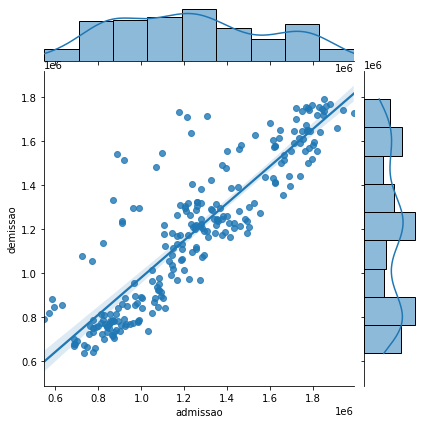

In [21]:
sns.jointplot(y='demissao',x='admissao',data=empregos, kind='reg')

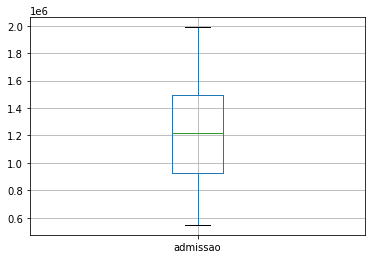

In [22]:
empregos.boxplot('admissao')

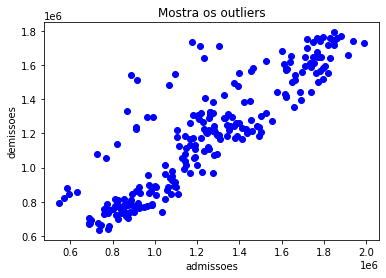

In [23]:
plt.scatter(empregos.admissao, empregos.demissao, c = "blue")
plt.title("Mostra os outliers")
plt.xlabel("admissoes")
plt.ylabel("demissoes")
plt.show()

In [24]:
correlacao = empregos.corr()
correlacao.sort_values("demissao", ascending = False, inplace=True)
print(correlacao.demissao)

demissao    1.000000
admissao    0.881227
data        0.730112
Name: demissao, dtype: float64


In [25]:
correlacao

,data,admissao,demissao
demissao,0.730112,0.881227,1.000000
admissao,0.617609,1.000000,0.881227
data,1.000000,0.617609,0.730112


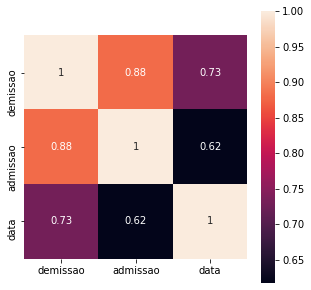

In [26]:
plt.figure(figsize=(5,5))
correlacao = empregos.corr()
corr_cols = correlacao.nlargest(10, 'demissao')['demissao']
sns.heatmap(empregos[corr_cols.index].corr(), annot=True, square=True)

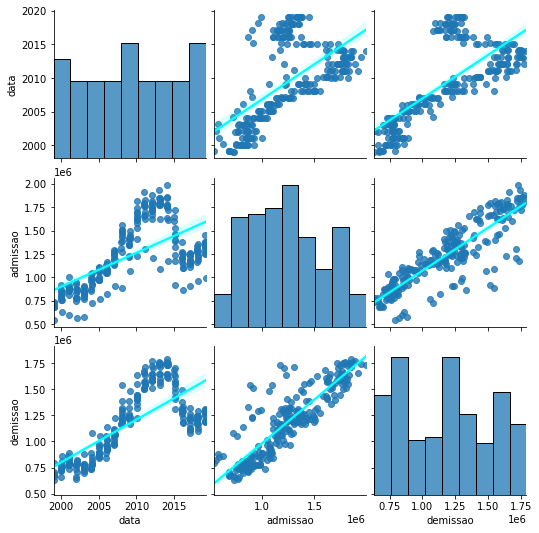

In [27]:
sns.pairplot(empregos, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})
plt.show()

In [28]:
empregos.head()

,data,admissao,demissao
0,1999.05,732704,635522
1,1999.06,731238,673129
2,1999.07,685905,677848
3,1999.08,690144,676838
4,1999.09,698632,691425


In [29]:
df_empregos_mult = empregos.copy()

In [30]:
df_empregos_mult.drop(columns=['demissao'], inplace=True)

In [31]:
df_empregos_mult.head()

,data,admissao
0,1999.05,732704
1,1999.06,731238
2,1999.07,685905
3,1999.08,690144
4,1999.09,698632


In [32]:
df_empregos_single = empregos.copy()

In [33]:
df_empregos_single.head()

,data,admissao,demissao
0,1999.05,732704,635522
1,1999.06,731238,673129
2,1999.07,685905,677848
3,1999.08,690144,676838
4,1999.09,698632,691425


In [34]:
df_empregos_single.drop(columns=['data','demissao'], inplace=True)

In [35]:
df_empregos_single.head()

,admissao
0,732704
1,731238
2,685905
3,690144
4,698632


In [36]:
df_demissao = empregos.demissao

## **Forma alternativa**

In [37]:
empregos.head()

,data,admissao,demissao
0,1999.05,732704,635522
1,1999.06,731238,673129
2,1999.07,685905,677848
3,1999.08,690144,676838
4,1999.09,698632,691425


In [38]:
features = ['data', 'admissao']
df_features = empregos[features]

In [39]:
df_target = empregos['demissao']

In [40]:
df_features.head()

,data,admissao
0,1999.05,732704
1,1999.06,731238
2,1999.07,685905
3,1999.08,690144
4,1999.09,698632


In [41]:
df_target.head()

0    635522
1    673129
2    677848
3    676838
4    691425
Name: demissao, dtype: int64

In [42]:
type(df_target)

pandas.core.series.Series

In [43]:
type(df_features)

pandas.core.frame.DataFrame

# **Dividir o dataframe entre treino(70%) e teste(30%).**

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df_empregos_mult, df_demissao, test_size=0.3)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((172, 2), (75, 2), (172,), (75,))

In [46]:
# Gera o modelo de regressão linear no dataset de treino
model = LinearRegression().fit(X_train, y_train)

In [47]:
# Faz as previsoes no dataset de teste
previsoes = model.predict(X_test)

In [48]:
# Validação e Performance do Modelo. Qual foi o score (R2)?
model.score(X_test, y_test)

0.8266690996439955

In [49]:
# Qual foi o Intercept?
model.intercept_

-35519866.46897413

In [50]:
# Qual foi o Slope?
model.coef_

array([1.78532854e+04, 6.71614476e-01])

In [51]:
len(y_test)

75

In [52]:
len(previsoes)

75

In [53]:
mae=mean_absolute_error(y_test, previsoes)
mae

105129.22778514713

In [54]:
x = np.array([1201201]).reshape(-1,1)
x

array([[1201201]])

In [ ]:
print(model.predict(x))